# 14.4. Computing connected components in an image

In [1]:
import itertools
import numpy as np
import networkx as nx
import matplotlib.colors as col
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10

In [3]:
img = np.random.randint(size=(n, n),
                        low=0, high=3)

In [4]:
g = nx.grid_2d_graph(n, n)

In [5]:
def show_image(img, ax=None, **kwargs):
    ax.imshow(img, origin='lower',
              interpolation='none',
              **kwargs)
    ax.set_axis_off()

In [6]:
def show_graph(g, ax=None, **kwargs):
    pos = {(i, j): (j, i) for (i, j) in g.nodes()}
    node_color = [img[i, j] for (i, j) in g.nodes()]
    nx.draw_networkx(g,
                     ax=ax,
                     pos=pos,
                     node_color='w',
                     linewidths=3,
                     width=2,
                     edge_color='w',
                     with_labels=False,
                     node_size=50,
                     **kwargs)

In [7]:
cmap = plt.cm.Blues

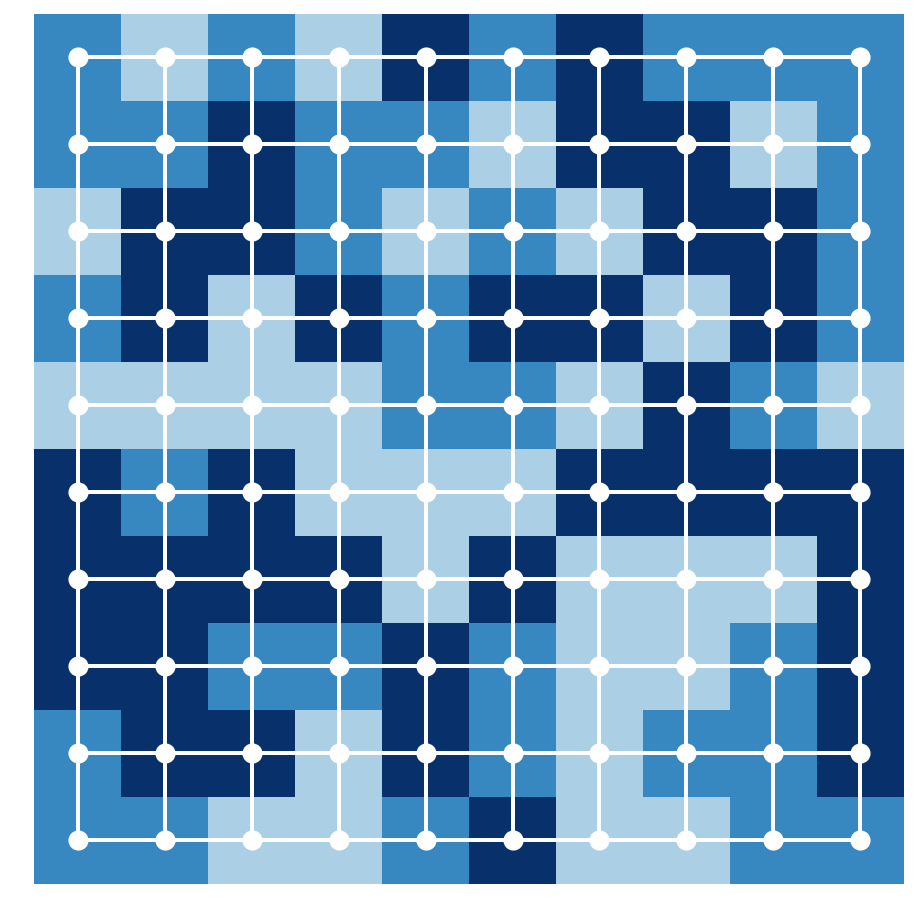

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img, ax=ax, cmap=cmap, vmin=-1)
show_graph(g, ax=ax, cmap=cmap, vmin=-1)

In [9]:
g2 = g.subgraph(zip(*np.nonzero(img == 2)))

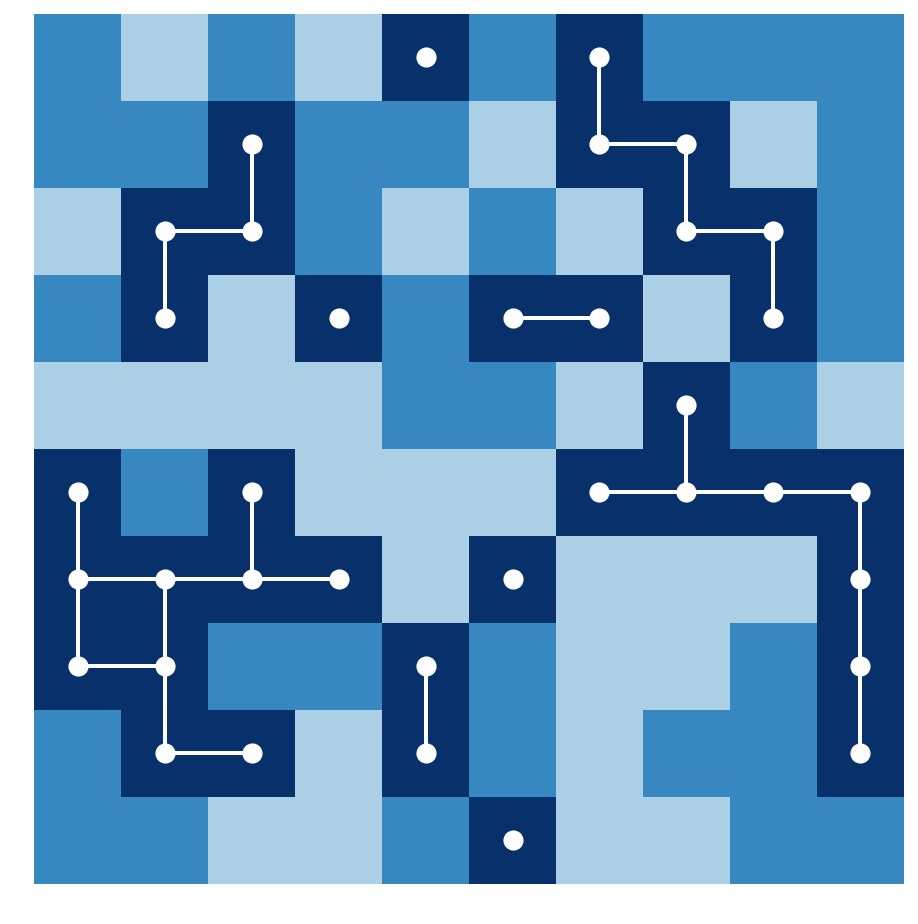

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img, ax=ax, cmap=cmap, vmin=-1)
show_graph(g2, ax=ax, cmap=cmap, vmin=-1)

In [11]:
components = [np.array(list(comp))
              for comp in nx.connected_components(g2)
              if len(comp) >= 3]
len(components)

4

In [12]:
# We copy the image, and assign a new label
# to each found component.
img_bis = img.copy()
for i, comp in enumerate(components):
    img_bis[comp[:, 0], comp[:, 1]] = i + 3

In [13]:
# We create a new discrete color map extending
# the previous map with new colors.
colors = [cmap(.5), cmap(.75), cmap(1.),
          '#f4f235', '#f4a535', '#f44b35',
          '#821d10']
cmap2 = col.ListedColormap(colors, 'indexed')

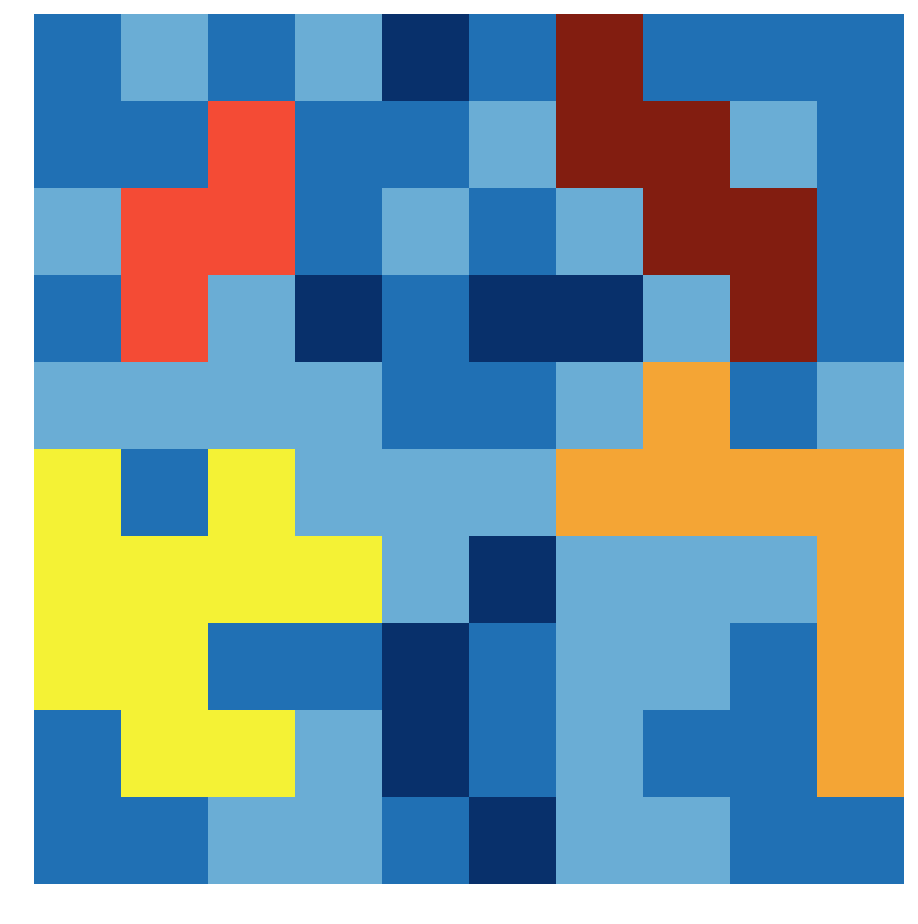

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img_bis, ax=ax, cmap=cmap2)